In [2]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import PlaintextCorpusReader
from collections import Counter
from gensim import corpora, models
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

## 1.Create corpus

In [3]:
# Assume that your text files are stored in a directory, with each text file representing a work
corpus_root = 'Imagist Poets'  # Replace with your actual path
file_pattern = r'.*\.txt'  # Match all files ending in .txt
# Create the corpus
Imagism_poets_corpus = PlaintextCorpusReader(corpus_root, file_pattern)
# Output the list of files in the corpus
print(Imagism_poets_corpus.fileids())
# Combine the texts from all files in the corpus
combined_imagism = ''.join(Imagism_poets_corpus.raw(file_id) for file_id in Imagism_poets_corpus.fileids())

['1909_E_Pound_Exultations.txt', '1909_JG_Fletcher_The_Japanese_Prints.txt', '1912_A Lowell_A Dome of Many-Coloured_Glass.txt', '1912_Canzoni & Ripostes_E_Pound&TE_Hulme.txt', '1913_A Lowell_Sword Blades and Poppy Seed.txt', '1914-DES IMAGISTES.txt', '1915-SOME IMAGIST POETS.txt', '1915_JG_Fletcher_Irradiations.txt', '1915_S_Cannell_Wild Songs.txt', '1916-SOME IMAGIST POETS.txt', '1916_A Lowell_Men_Women_Rose.txt', '1916_E_Pound_Lustra.txt', '1916_H_Doolittle_SeaGarden.txt', '1917-SOME IMAGIST POETS.txt', '1917_R_Aldington.txt', '1919_E_Pound_Exultations.txt', '1921_E_Pound_Three_Portraits_and_Four_Cantos.txt', '1921_H_Doolittle_Hymen.txt', '1922_TS_Eliot_The_Waste_Land.txt', '1924_FM_Ford_Collected_Poems.txt', '1926_E_Pound_Personae.txt', '1930-New Poetry by the Imagists.txt']


In [4]:
corpus_root = 'Georgian Poetry'  # Replace with your actual path
file_pattern = r'.*\.txt'  # Match all files ending in .txt
# Create the corpus
Georgian_Poetry_corpus = PlaintextCorpusReader(corpus_root, file_pattern)
# Output the list of files in the corpus
print("The list of Georgian_Poetry:")
print(Georgian_Poetry_corpus.fileids())
combined_Georgian= ''.join(Georgian_Poetry_corpus.raw(file_id) for file_id in Georgian_Poetry_corpus.fileids())

The list of Georgian_Poetry:
['1911-1912 Georgian_Poetry.txt', '1913-1915_Georgian_Poetry.txt', '1916-1217_Georgian_Poetry.txt', '1918-1919 Georgian_Poetry.txt', '1920-1921 Georgian_Poetry.txt']


In [5]:
corpus_root = 'Objective Poetry'  # Replace with your actual path
file_pattern = r'.*\.txt'  # Match all files ending in .txt
# Create the corpus
Objective_Poetry_corpus = PlaintextCorpusReader(corpus_root, file_pattern)
# Output the list of files in the corpus
print("The list of Objective_Poetry:")
print(Objective_Poetry_corpus.fileids())
combined_Ojective = ''.join(Objective_Poetry_corpus.raw(file_id) for file_id in Objective_Poetry_corpus.fileids())

The list of Objective_Poetry:
['Basil Bunting.txt', 'CARL RAKOSI.txt', 'Charles Reznikoff.txt', 'Goegen Oppen.txt', 'LOUIS ZUKOFSKY.txt', 'Lorine Niedecker.txt', 'The FEBRUARY 1931.txt', 'WILLIAM CARLOS WILLIAMS.txt', 'other writers.txt']


## 1.Topic modeling

In [6]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
from gensim import corpora, models

# Ensure stopwords are downloaded
nltk.download('stopwords')
nltk.download('punkt')

def topic_model(documents, num_topics, passes):
    alpha = 0.2
    eta = 0.2
    stop_words = set(stopwords.words('english'))
    
    # Text Preprocessing: Removing Stop Words
    filtered_documents = [
        ' '.join([word.lower() for word in doc.split() if word.isalpha() and word.lower() not in stop_words])
        for doc in documents
    ]
    
    # Flatten the list of filtered documents into a single list of tokens
    all_tokens = ' '.join(filtered_documents).split()
    
    # Calculate word frequencies
    word_frequencies = Counter(all_tokens)
    
    # Identify the top 20 high-frequency words
    top_words = {word for word, frequency in word_frequencies.most_common(20)}
    print(top_words)
    
    # Remove the top 20 high-frequency words from the filtered documents
    final_documents = [
        ' '.join([word for word in doc.split() if word not in top_words])
        for doc in filtered_documents
    ]
    
    # Create a dictionary and bag-of-words representation for the filtered corpus
    dictionary = corpora.Dictionary([doc.split() for doc in final_documents])
    corpus_bow = [dictionary.doc2bow(doc.split()) for doc in final_documents]
    
    # Perform topic modeling on the corpus
    lda_model = models.LdaModel(corpus_bow, num_topics=num_topics, id2word=dictionary, passes=passes, alpha=alpha, eta=eta)
    
    # Print the keywords for each topic in the model
    topics = lda_model.print_topics(num_topics=num_topics)
    for topic in topics:
        print(topic)
    
    return lda_model, corpus_bow, dictionary

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gdwyl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gdwyl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

# Download necessary resources
nltk.download('punkt')
nltk.download('stopwords')

# Function to preprocess documents and find top 20 high-frequency words
def find_top_words(documents):
    stop_words = set(stopwords.words('english'))
    
    # Text Preprocessing: Tokenization, Removing Stop Words, and Removing Punctuation
    tokenized_documents = [
        [word.lower() for word in word_tokenize(doc) if word.isalpha() and word.lower() not in stop_words]
        for doc in documents
    ]
    
    # Flatten the list of tokenized documents into a single list of tokens
    all_tokens = [token for tokens in tokenized_documents for token in tokens]
    
    # Calculate word frequencies
    word_frequencies = Counter(all_tokens)
    
    # Identify the top 20 high-frequency words
    top_words = word_frequencies.most_common(20)
    
    return top_words

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gdwyl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gdwyl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 1)Imagism Poets

In [8]:
documents2 = [Imagism_poets_corpus.raw(file_id) for file_id in Imagism_poets_corpus.fileids()]

In [9]:
imagism_top_words=find_top_words(documents2)
print(imagism_top_words)

[('like', 731), ('one', 634), ('upon', 505), ('old', 479), ('white', 450), ('little', 449), ('shall', 434), ('love', 417), ('wind', 417), ('come', 395), ('us', 393), ('god', 388), ('man', 380), ('night', 363), ('would', 358), ('eyes', 344), ('heart', 335), ('light', 321), ('see', 318), ('long', 314)]


In [10]:
# Run the topic model
lda_model, corpus_bow, dictionary = topic_model(documents2, num_topics=50, passes=15)

{'man', 'white', 'shall', 'never', 'old', 'little', 'heart', 'great', 'one', 'would', 'come', 'love', 'us', 'eyes', 'like', 'see', 'know', 'wind', 'long', 'upon'}
(0, '0.000*"day" + 0.000*"night" + 0.000*"let" + 0.000*"thy" + 0.000*"sun" + 0.000*"blue" + 0.000*"ye" + 0.000*"hath" + 0.000*"yet" + 0.000*"set"')
(1, '0.000*"night" + 0.000*"thy" + 0.000*"let" + 0.000*"thou" + 0.000*"still" + 0.000*"light" + 0.000*"green" + 0.000*"men" + 0.000*"must" + 0.000*"could"')
(2, '0.000*"god" + 0.000*"aldington" + 0.000*"richard" + 0.000*"satan" + 0.000*"must" + 0.000*"let" + 0.000*"williams" + 0.000*"thought" + 0.000*"even" + 0.000*"william"')
(3, '0.000*"let" + 0.000*"night" + 0.000*"still" + 0.000*"day" + 0.000*"could" + 0.000*"new" + 0.000*"sun" + 0.000*"must" + 0.000*"green" + 0.000*"men"')
(4, '0.000*"blue" + 0.000*"still" + 0.000*"night" + 0.000*"must" + 0.000*"men" + 0.000*"red" + 0.000*"let" + 0.000*"could" + 0.000*"light" + 0.000*"life"')
(5, '0.000*"thy" + 0.000*"day" + 0.000*"night" + 0

In [11]:
# Plot the top words for the first 5 topics
plot_top_words(lda_model, num_words=10, num_topics=50)

NameError: name 'plot_top_words' is not defined

In [ ]:
lda_vis_data2 = gensimvis.prepare(lda_model, corpus_bow, dictionary)
display(lda_vis_data2)

In [ ]:
pyLDAvis.save_html(lda_vis_data2, 'lda_visualization.html')

# Open the HTML file in the default web browser
import webbrowser
webbrowser.open('lda_visualization.html')

### 2)Georgian_Poetry

In [12]:
documents1 = [Georgian_Poetry_corpus.raw(file_id) for file_id in Georgian_Poetry_corpus.fileids()]
# Run the topic model
lda_model, corpus_bow, dictionary = topic_model(documents1, num_topics=20, passes=10)

{'man', 'shall', 'never', 'old', 'little', 'heart', 'men', 'yet', 'one', 'could', 'would', 'come', 'though', 'eyes', 'must', 'like', 'still', 'see', 'long', 'upon'}
(0, '0.000*"night" + 0.000*"great" + 0.000*"may" + 0.000*"sun" + 0.000*"light" + 0.000*"know" + 0.000*"go" + 0.000*"last" + 0.000*"time" + 0.000*"world"')
(1, '0.000*"white" + 0.000*"love" + 0.000*"came" + 0.000*"night" + 0.000*"light" + 0.000*"know" + 0.000*"us" + 0.000*"every" + 0.000*"day" + 0.000*"thou"')
(2, '0.003*"love" + 0.003*"thought" + 0.003*"go" + 0.003*"know" + 0.003*"take" + 0.003*"world" + 0.003*"make" + 0.002*"till" + 0.002*"green" + 0.002*"came"')
(3, '0.004*"dark" + 0.004*"white" + 0.004*"light" + 0.004*"green" + 0.004*"love" + 0.003*"thy" + 0.003*"night" + 0.003*"thou" + 0.003*"may" + 0.003*"far"')
(4, '0.000*"world" + 0.000*"thought" + 0.000*"let" + 0.000*"go" + 0.000*"know" + 0.000*"made" + 0.000*"wind" + 0.000*"night" + 0.000*"may" + 0.000*"heard"')
(5, '0.000*"dark" + 0.000*"love" + 0.000*"light" + 0.

In [13]:
lda_vis_data1 = gensimvis.prepare(lda_model, corpus_bow, dictionary)
display(lda_vis_data1)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.144966 -0.041696       1        1  43.492907
17    -0.153649 -0.032922       2        1  38.645506
3     -0.148513  0.074898       3        1  17.825469
4      0.018857 -0.002602       4        1   0.002125
12     0.022861 -0.000781       5        1   0.002125
15     0.022944 -0.000104       6        1   0.002125
0      0.025819 -0.000243       7        1   0.002125
8      0.026267  0.000184       8        1   0.002125
7      0.026196  0.000023       9        1   0.002125
9      0.026254  0.000121      10        1   0.002125
18     0.026821 -0.000040      11        1   0.002125
11     0.027317  0.000427      12        1   0.002125
13     0.027508  0.000135      13        1   0.002125
16     0.027631  0.000461      14        1   0.002125
10     0.027649  0.000352      15        1   0.002125
1      0.027686  0.000291      16        1   0.0021

In [14]:
pyLDAvis.save_html(lda_vis_data1, 'lda_visualization.html')

# Open the HTML file in the default web browser
import webbrowser
webbrowser.open('lda_visualization.html')

True

In [15]:
georgian_top_words=find_top_words(documents1)
print(georgian_top_words)

[('like', 466), ('one', 373), ('eyes', 315), ('night', 294), ('man', 287), ('still', 267), ('men', 242), ('shall', 236), ('come', 235), ('love', 234), ('yet', 231), ('upon', 230), ('heart', 227), ('would', 220), ('light', 219), ('life', 210), ('day', 210), ('world', 207), ('know', 198), ('old', 195)]


In [ ]:
plot_top_words(lda_model, num_words=10, num_topics=20)

### 3).Objectivsim Poetry

In [28]:
documents3 = [Objective_Poetry_corpus.raw(file_id) for file_id in Objective_Poetry_corpus.fileids()]
# Run the topic model
lda_model, corpus_bow, dictionary = topic_model(documents3, num_topics=20, passes=10)

{'man', 'make', 'old', 'two', 'little', 'night', 'men', 'time', 'light', 'one', 'could', 'love', 'us', 'eyes', 'like', 'may', 'see', 'know', 'new', 'would'}
(0, '0.000*"things" + 0.000*"must" + 0.000*"go" + 0.000*"nothing" + 0.000*"air" + 0.000*"water" + 0.000*"great" + 0.000*"said" + 0.000*"life" + 0.000*"world"')
(1, '0.000*"things" + 0.000*"go" + 0.000*"song" + 0.000*"louis" + 0.000*"poetry" + 0.000*"never" + 0.000*"without" + 0.000*"less" + 0.000*"many" + 0.000*"sea"')
(2, '0.005*"blue" + 0.005*"carl" + 0.004*"rakosi" + 0.003*"small" + 0.003*"white" + 0.003*"open" + 0.003*"magazine" + 0.003*"verse" + 0.003*"wind" + 0.003*"hand"')
(3, '0.000*"must" + 0.000*"many" + 0.000*"go" + 0.000*"nothing" + 0.000*"without" + 0.000*"water" + 0.000*"shall" + 0.000*"young" + 0.000*"white" + 0.000*"poetry"')
(4, '0.000*"louis" + 0.000*"look" + 0.000*"whose" + 0.000*"go" + 0.000*"things" + 0.000*"shall" + 0.000*"song" + 0.000*"life" + 0.000*"poetry" + 0.000*"sea"')
(5, '0.005*"children" + 0.003*"goo

In [29]:
lda_vis_data3 = gensimvis.prepare(lda_model, corpus_bow, dictionary)
display(lda_vis_data3)
pyLDAvis.save_html(lda_vis_data3, 'lda_visualization.html')

# Open the HTML file in the default web browser
import webbrowser
webbrowser.open('lda_visualization.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.092966 -0.020762       1        1  36.169520
9     -0.111493  0.073419       2        1  19.231897
5      0.084513  0.109807       3        1  16.337023
13     0.003861 -0.052030       4        1   9.047314
2     -0.011331 -0.038853       5        1   7.716967
14     0.017613  0.004599       6        1   7.085021
12    -0.007610 -0.047320       7        1   4.287323
4     -0.003417 -0.001637       8        1   0.009611
1     -0.004526 -0.002333       9        1   0.009610
10    -0.004434 -0.000752      10        1   0.009610
8     -0.005101 -0.001803      11        1   0.009610
3     -0.005558 -0.002434      12        1   0.009610
15    -0.005702 -0.002538      13        1   0.009610
18    -0.005617 -0.002463      14        1   0.009610
0     -0.005614 -0.002324      15        1   0.009610
19    -0.005460 -0.002541      16        1   0.0096

True

In [35]:
Objective_top_words=find_top_words(documents3)
print(Objective_top_words)

[('one', 173), ('like', 125), ('man', 119), ('us', 102), ('men', 92), ('love', 85), ('see', 84), ('eyes', 83), ('time', 74), ('old', 73), ('night', 72), ('poetry', 72), ('little', 70), ('would', 68), ('said', 59), ('light', 58), ('two', 56), ('water', 56), ('may', 55), ('song', 55)]


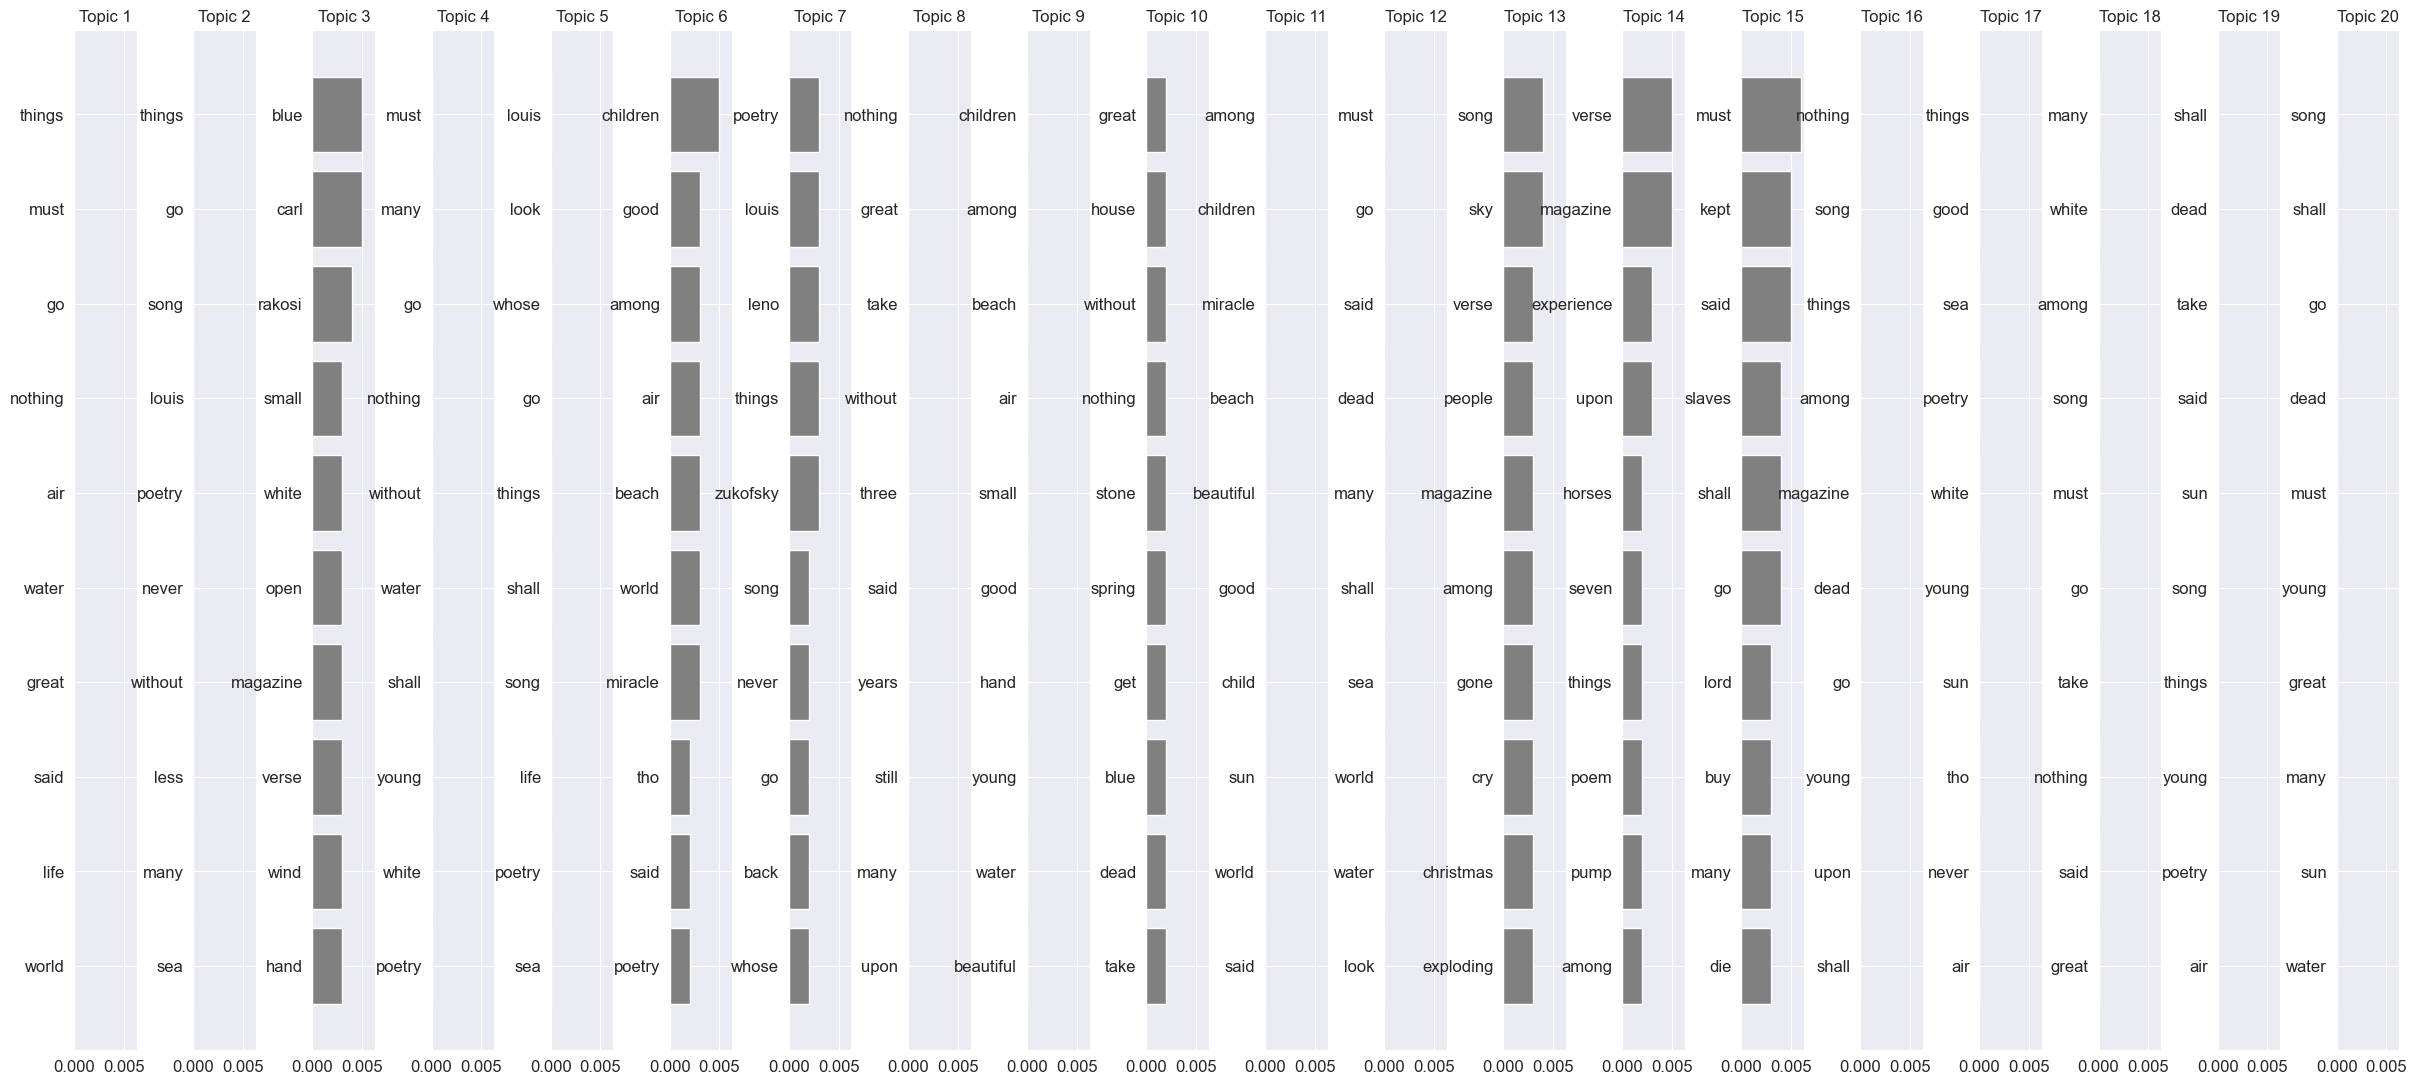

In [30]:
plot_top_words(lda_model, num_words=10, num_topics=20)

In [31]:
import matplotlib.pyplot as plt

def plot_top_words(lda_model, num_words=10, num_topics=20):
    fig, axes = plt.subplots(1, num_topics, figsize=(30, 12), sharex=True)
    axes = axes.flatten()
    
    for topic_idx, topic in enumerate(lda_model.print_topics(num_topics=num_topics, num_words=num_words)):
        words_weights = topic[1].split(' + ')
        words = []
        weights = []
        
        for word_weight in words_weights:
            weight, word = word_weight.split('*')
            words.append(word.replace('"', '').strip())
            weights.append(float(weight))
        
        ax = axes[topic_idx]
        ax.barh(words, weights, color='grey')  # 使用浅红色
        ax.set_title(f'Topic {topic_idx + 1}', fontsize=12)
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=12)
    
    plt.subplots_adjust(top=0.9, bottom=0.05, wspace=0.9, hspace=0.3)
    plt.show()

In [32]:
from typing import List
import numpy as np

# 定义TTR和STTR计算函数
def calculate_ttr(tokens: List[str]) -> float:
    types = len(set(tokens))
    tokens_count = len(tokens)
    return types / tokens_count if tokens_count else 0

def calculate_sttr(tokens: List[str], segment_length: int = 1000) -> float:
    if segment_length <= 0 or not tokens:
        return 0
    segments = [tokens[i:i + segment_length] for i in range(0, len(tokens), segment_length)]
    ttr_scores = [calculate_ttr(segment) for segment in segments if len(segment) > 0]
    return np.mean(ttr_scores)

def calculate_corpus_average_ttr_sttr(corpus):
    all_tokens = []  # 存储整个语料库的所有词汇
    for fileid in corpus.fileids():
        all_tokens.extend(corpus.words(fileid))
    
    # 计算整个语料库的TTR和STTR
    total_ttr = calculate_ttr(all_tokens)
    total_sttr = calculate_sttr(all_tokens, 100)  # 假设每个段落约100个词
    return total_ttr, total_sttr

In [33]:
# Calculate TTR and STTR for each corpus
imagism_ttr, imagism_sttr = calculate_corpus_average_ttr_sttr(Imagism_poets_corpus)
georgian_ttr, georgian_sttr = calculate_corpus_average_ttr_sttr(Georgian_Poetry_corpus)
objective_ttr, objective_sttr = calculate_corpus_average_ttr_sttr(Objective_Poetry_corpus)

# Print the results formatted to three decimal places
print(f"Imagism Poets Corpus - TTR: {imagism_ttr:.3f}, STTR: {imagism_sttr:.3f}")
print(f"Georgian Poetry Corpus - TTR: {georgian_ttr:.3f}, STTR: {georgian_sttr:.3f}")
print(f"Objective Poetry Corpus - TTR: {objective_ttr:.3f}, STTR: {objective_sttr:.3f}")

Imagism Poets Corpus - TTR: 0.083, STTR: 0.701
Georgian Poetry Corpus - TTR: 0.095, STTR: 0.729
Objective Poetry Corpus - TTR: 0.191, STTR: 0.738


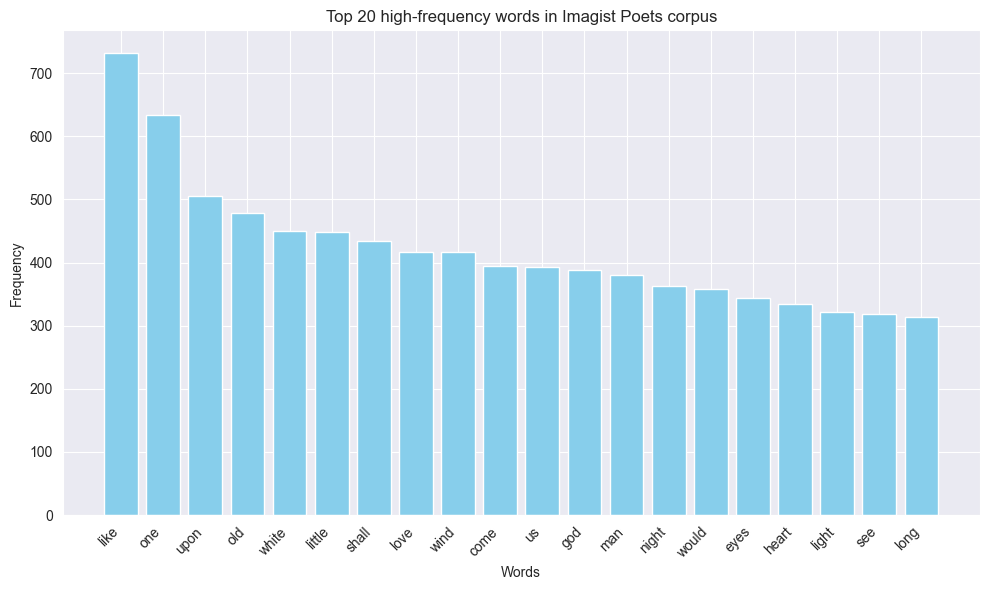

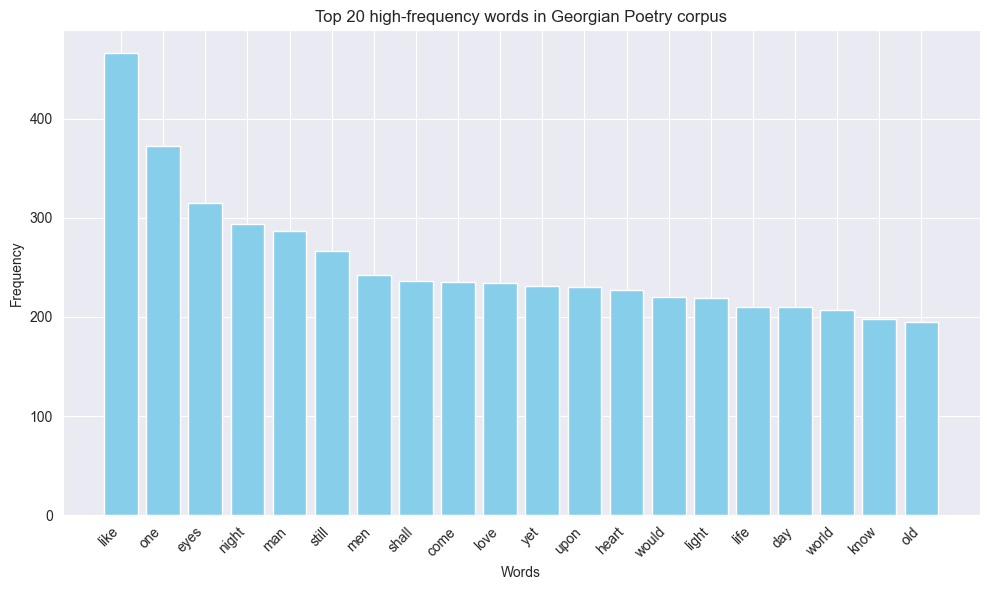

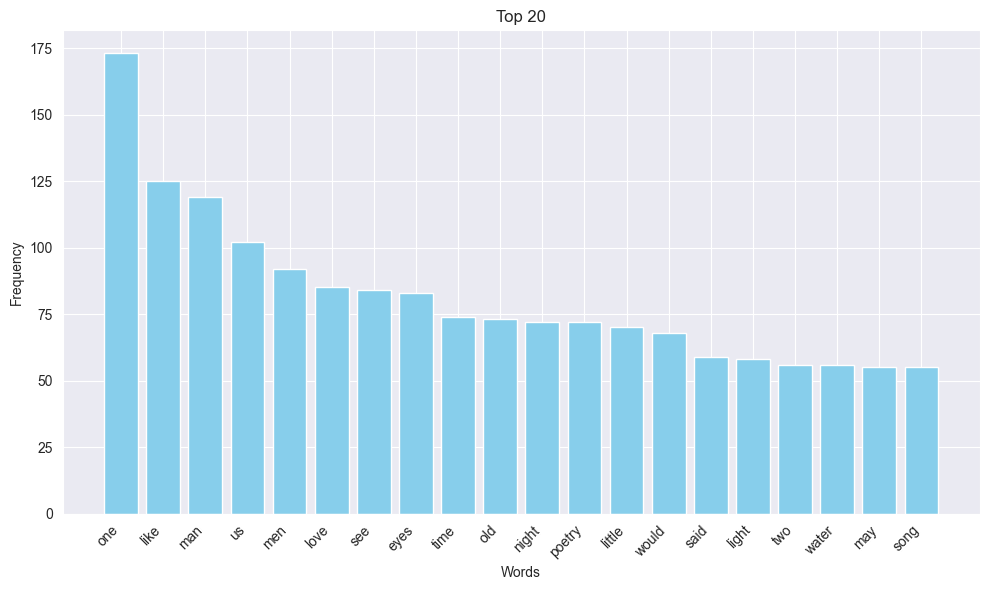

In [36]:
import matplotlib.pyplot as plt

# Function to plot bar chart for top 20 high-frequency words
def plot_bar_chart(top_words, title):
    words = [word for word, _ in top_words]
    frequencies = [frequency for _, frequency in top_words]
    plt.figure(figsize=(10, 6))
    plt.bar(words, frequencies, color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot bar chart for Imagist Poets
plot_bar_chart(imagism_top_words, "Top 20 high-frequency words in Imagist Poets corpus")

# Plot bar chart for Georgian Poetry
plot_bar_chart(georgian_top_words, "Top 20 high-frequency words in Georgian Poetry corpus")
plot_bar_chart(Objective_top_words,"Top 20")


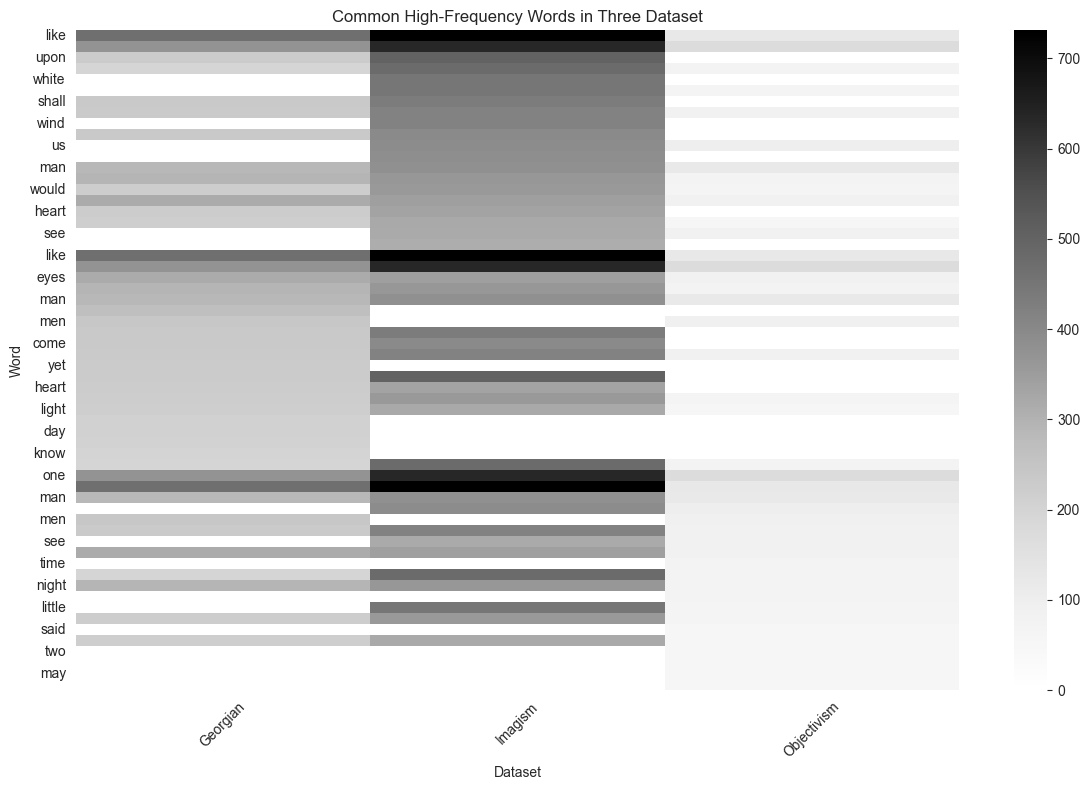

In [37]:
import seaborn as sns
import pandas as pd

# Combine top words from all three corpora
combined_top_words = imagism_top_words + georgian_top_words + Objective_top_words

# Create a list to store frequencies of common high-frequency words
word_freqs = []
for word, freq in combined_top_words:
    imagism_freq = next((f for w, f in imagism_top_words if w == word), 0)
    georgian_freq = next((f for w, f in georgian_top_words if w == word), 0)
    objective_freq = next((f for w, f in Objective_top_words if w == word), 0)
    word_freqs.append({'Word': word, 'Georgian': georgian_freq, 'Imagism': imagism_freq, 'Objectivism': objective_freq})

# Create a DataFrame from the list
df = pd.DataFrame(word_freqs)

# Set the 'Word' column as the index
df.set_index('Word', inplace=True)

# Generate heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df, annot=False, cmap="Greys")  # 将 cmap 参数设置为 'Greys'
plt.title("Common High-Frequency Words in Three Dataset")
plt.xlabel("Dataset")
plt.ylabel("Word")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

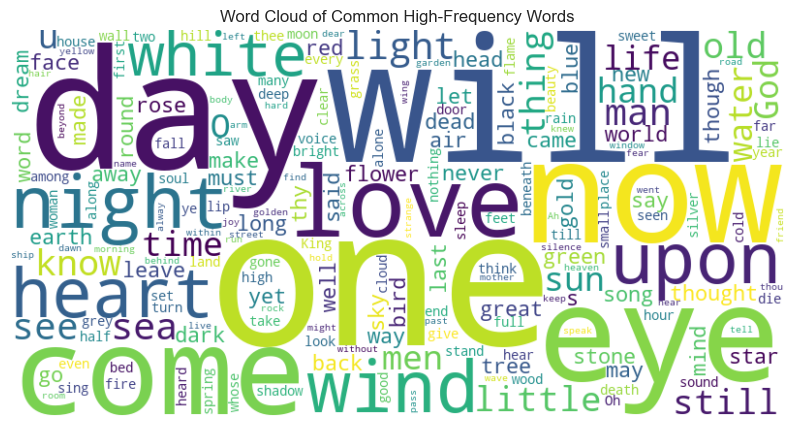

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine text from all three corpora
combined_text = combined_imagism + combined_Georgian + combined_Ojective

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Common High-Frequency Words')
plt.axis('off')
plt.show()
